## 1. Checking and adjusting data for alignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

In [ ]:
spotify1_final = pd.read_csv('/content/drive/MyDrive/DSO 528/DSO528 Final Project/Data/spotify1_final.csv')

In [ ]:
spotify1_final = spotify1_final.drop(columns=['released_day','streams','artist_count','released_date'])

In [ ]:
spotify1_final.head()

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,0,2001.0,1.0,['rock'],0.682,0.401,D,-10.068,1,0.0236,0.279000,0.011700,0.0887,0.566,97,235440.0
1,008MceT31RotUANsKuzy3L,Liquid Blue,The.madpix.project,0,2015.0,8.0,['pop'],0.659,0.794,A♯/B♭,-5.644,0,0.0540,0.000761,0.132000,0.3220,0.852,128,228565.0
2,008rk8F6ZxspZT4bUlkIQG,Fever,YOSA & TAAR,0,2018.0,11.0,['pop'],0.662,0.838,C♯/D♭,-6.300,1,0.0499,0.114000,0.000697,0.0881,0.496,129,236308.0
3,00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,Thalía,0,2018.0,6.0,['latin'],0.836,0.799,G,-4.247,0,0.0873,0.187000,0.000000,0.0920,0.772,94,217653.0
4,00FR9VQ0uzF4NNxVKKiMz2,Full Of Smoke,Christión,0,1997.0,1.0,['r&b'],0.389,0.616,C♯/D♭,-8.747,0,0.2840,0.453000,0.000000,0.9160,0.716,145,289227.0


In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
spotify1_final[['popular', 'released_year', 'released_month', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].corr().loc['popular'].sort_values(ascending=False)

,popular
popular,1.000000
loudness,0.066213
acousticness,0.044246
danceability,0.037827
valence,0.037137
released_month,0.029422
mode,0.022765
tempo,0.006149
speechiness,-0.006101
released_year,-0.010682


In [ ]:
spotify1_final['playlist_genre'][19]

"['edm', 'r&b', 'rap']"

In [ ]:
# prompt: Help me change the data type of str to list in spotify1_final['playlist_genre']

import ast

# Assuming 'spotify1_final' DataFrame is already loaded as in your provided code

# Convert string representation of lists to actual lists
spotify1_final['playlist_genre'] = spotify1_final['playlist_genre'].apply(ast.literal_eval)

In [ ]:
# create a "number_of_genres" column
number_of_genres = []
for i in spotify1_final['playlist_genre']:
    number_of_genres.append(len(i))
spotify1_final['number_of_genres'] = number_of_genres

In [ ]:
spotify1_final['playlist_genre'][19]

['edm', 'r&b', 'rap']

In [ ]:
import pandas as pd

# Group by 'number_of_genres', calculate average 'released_year' and 'popular'
grouped = spotify1_final.groupby('number_of_genres').agg(
    avg_released_year=('released_year', 'mean'),
    avg_popular=('popular', 'mean'),
    value_counts=('number_of_genres', 'count')
)

# Format the results
grouped['avg_released_year'] = grouped['avg_released_year'].astype(int)
grouped['avg_popular'] = grouped['avg_popular'].round(3)

# Sort by 'number_of_genres' in descending order
grouped = grouped.sort_values('number_of_genres', ascending=False)

# Display the table
grouped

,avg_released_year,avg_popular,value_counts
number_of_genres,,,
5,2018,1.000,3
4,2018,0.957,46
3,2015,0.813,134
2,2013,0.575,1028
1,2010,0.146,22095


In [ ]:
spotify1_final[['popular']].value_counts()

,count
popular,
0,19335
1,3971


### (1) Clustering (Energy + Valence)


In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres'],
      dtype='object')

In [ ]:
# prompt: use "energy" and "valence" columns in spotify1_final data to perform k-mean clustering with seed 528, standardize all the variables, make a copy of the data and save cluster label to the copy of data. plot the silhouette plot to help determine the best number of clusters
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

# Create a copy of the data
spotify1_final_copy = spotify1_final.copy()

# Select features for clustering
features = ['energy', 'valence']
X = spotify1_final[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=528)
spotify1_final_copy['cluster_label'] = kmeans.fit_predict(X_scaled)

# check the unique cluster_label
spotify1_final_copy['cluster_label'].unique()

array([1, 2, 0, 3], dtype=int32)

In [ ]:
# Assuming spotify1_final_copy DataFrame is already created and populated as in the provided code.

for cluster in range(4):  # Iterate through clusters 0 to 3
    print(f"Cluster {cluster}:")
    cluster_tracks = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]['track_name'].head(5)
    for track in cluster_tracks:
      print(track)
    print("-" * 20) # Separator between clusters

Cluster 0:
Fever
Hide Away (feat. Envy Monroe)
Ti volevo dedicare (feat. J-AX & Boomdabash)
It Won't Stop (feat. Chris Brown) - Julian Calor Remix
Give You Everything
--------------------
Cluster 1:
Pangarap
Full Of Smoke
Satisfy You
Limestone
Brut Riddim - 120 bpm
--------------------
Cluster 2:
Liquid Blue
No Me Acuerdo
Tender Lover
Let Me Entertain You - Remastered 2011
Latina (feat. Maluma)
--------------------
Cluster 3:
Thousand Lakes
Shine - Kygo Remix
Baby It's Cold Outside (feat. Christina Aguilera)
Stop Lying
Me Enamoré
--------------------


In [ ]:
spotify1_final_copy.head()

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,number_of_genres,cluster_label
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,0,2001.0,1.0,[rock],0.682,0.401,D,...,1,0.0236,0.279000,0.011700,0.0887,0.566,97,235440.0,1,1
1,008MceT31RotUANsKuzy3L,Liquid Blue,The.madpix.project,0,2015.0,8.0,[pop],0.659,0.794,A♯/B♭,...,0,0.0540,0.000761,0.132000,0.3220,0.852,128,228565.0,1,2
2,008rk8F6ZxspZT4bUlkIQG,Fever,YOSA & TAAR,0,2018.0,11.0,[pop],0.662,0.838,C♯/D♭,...,1,0.0499,0.114000,0.000697,0.0881,0.496,129,236308.0,1,0
3,00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,Thalía,0,2018.0,6.0,[latin],0.836,0.799,G,...,0,0.0873,0.187000,0.000000,0.0920,0.772,94,217653.0,1,2
4,00FR9VQ0uzF4NNxVKKiMz2,Full Of Smoke,Christión,0,1997.0,1.0,[r&b],0.389,0.616,C♯/D♭,...,0,0.2840,0.453000,0.000000,0.9160,0.716,145,289227.0,1,1


In [ ]:
# Group data by cluster_label and calculate the average of numerical columns
grouped_data = spotify1_final_copy.groupby('cluster_label').agg({
    'popular': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'acousticness': 'mean',
    'danceability': 'mean',
    'duration_ms': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'tempo': 'mean',
    'released_year': 'mean'
}).sort_values('popular', ascending=False)

grouped_data

,popular,energy,valence,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,released_year
cluster_label,,,,,,,,,,,,,
3,0.199397,0.448858,0.288453,0.348861,0.621889,226409.605224,0.109790,0.162140,-9.465584,0.581498,0.101065,116.543010,2011.817065
1,0.189662,0.576401,0.649814,0.233433,0.713429,227007.746529,0.052526,0.170009,-8.150086,0.552652,0.125859,116.832437,2008.754035
2,0.179332,0.824559,0.734648,0.123642,0.684564,224250.393878,0.059387,0.201288,-5.638004,0.570520,0.105996,121.621821,2008.746156
0,0.129680,0.817117,0.324078,0.083124,0.598274,228912.554386,0.133110,0.216762,-5.356121,0.557438,0.098640,124.467331,2013.381922


In [ ]:
import pandas as pd

# Initialize an empty DataFrame to store the results
cluster_genre_counts = pd.DataFrame()

# Iterate over each cluster
clusters = [0, 1, 2, 3]
for cluster in clusters:
    # Filter rows for the current cluster
    cluster_data = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]

    # Flatten the genre lists into a single list
    flattened_genres = cluster_data['playlist_genre'].explode()

    # Count occurrences of each genre
    genre_counts = flattened_genres.value_counts()

    # Add the counts to the DataFrame
    cluster_genre_counts[f'Cluster_{cluster}'] = genre_counts

# Replace NaN with 0 and convert to integers
cluster_genre_counts = cluster_genre_counts.fillna(0).astype(int)

# Display the resulting DataFrame
print(cluster_genre_counts)

                Cluster_0  Cluster_1  Cluster_2  Cluster_3
playlist_genre                                            
edm                  2677        400       1010        372
pop                  1289        814       1272        777
rock                 1187        669       1235        543
rap                  1020       1298       1085       1062
latin                 740        941       1609        499
r&b                   499       1419        923       1290
Unknown                26         29         23         44


In [ ]:
spotify1_final_copy.groupby('cluster_label').size()

,0
cluster_label,
0,7025
1,5204
2,6764
3,4313


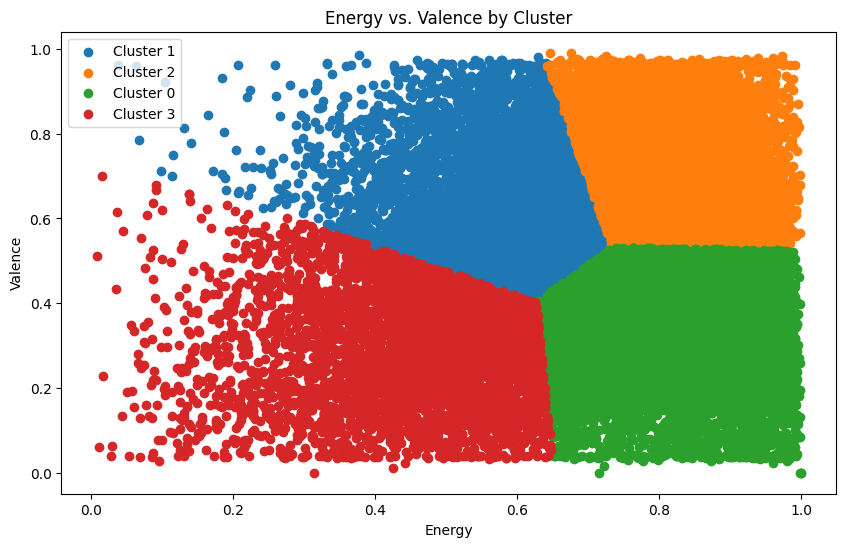

In [ ]:
# Assuming spotify1_final_copy DataFrame is already created and populated as in the provided code.

plt.figure(figsize=(10, 6))
for cluster in spotify1_final_copy['cluster_label'].unique():
    cluster_data = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]
    plt.scatter(cluster_data['energy'], cluster_data['valence'], label=f'Cluster {cluster}')

plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Energy vs. Valence by Cluster')
plt.legend()
plt.show()

In [ ]:
# add cluster_label to the spotify1_final data
spotify1_final = spotify1_final_copy

## 2. Train Test Split

In [ ]:
# This is the data with genre as dummy variables
spotify1_final.shape

(23306, 21)

### (1) Converting playlist_genre into dummy variables

In [ ]:
# Convert playlist_genre column into dummy variables

# Step 1: Explode the 'playlist_genre' column into separate rows
exploded_df = spotify1_final.explode('playlist_genre')

# Step 2: Create dummy variables for each genre (after exploding)
dummies = pd.get_dummies(exploded_df['playlist_genre'], prefix='genre', drop_first=False)

# Step 3: Drop the "Unknown" category (if needed)
if 'genre_Unknown' in dummies.columns:
    dummies = dummies.drop(columns=['genre_Unknown'])

# Step 4: Add the dummy variables back to the DataFrame
# Group by the index to sum the dummy columns for each row (this reconstructs the original shape)
spotify1_final = pd.concat([spotify1_final, dummies.groupby(exploded_df.index).sum()], axis=1)

In [ ]:
spotify1_final.iloc[:,4:]

,released_year,released_month,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,duration_ms,number_of_genres,cluster_label,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
0,2001.0,1.0,[rock],0.682,0.401,D,-10.068000,1,0.0236,0.279000,...,97,235440.000000,1,1,0,0,0,0,0,1
1,2015.0,8.0,[pop],0.659,0.794,A♯/B♭,-5.644000,0,0.0540,0.000761,...,128,228565.000000,1,2,0,0,1,0,0,0
2,2018.0,11.0,[pop],0.662,0.838,C♯/D♭,-6.300000,1,0.0499,0.114000,...,129,236308.000000,1,0,0,0,1,0,0,0
3,2018.0,6.0,[latin],0.836,0.799,G,-4.247000,0,0.0873,0.187000,...,94,217653.000000,1,2,0,1,0,0,0,0
4,1997.0,1.0,[r&b],0.389,0.616,C♯/D♭,-8.747000,0,0.2840,0.453000,...,145,289227.000000,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23301,2017.0,8.0,[Unknown],0.750,0.250,B,-6.771935,0,0.2600,0.780000,...,140,225846.314089,1,3,0,0,0,0,0,0
23302,2019.0,8.0,[Unknown],0.370,0.670,D♯/E♭,-6.771935,1,0.0900,0.020000,...,141,225846.314089,1,0,0,0,0,0,0,0
23303,1979.0,11.0,[Unknown],0.750,0.580,B,-6.771935,1,0.0300,0.360000,...,95,225846.314089,1,1,0,0,0,0,0,0
23304,2019.0,8.0,[Unknown],0.550,0.720,A,-6.771935,1,0.1500,0.110000,...,170,225846.314089,1,1,0,0,0,0,0,0


### (2) Convert 'cluster_label' column into dummy variables

In [ ]:
# Convert 'cluster_label' column into dummy variables
cluster_dummies = pd.get_dummies(spotify1_final['cluster_label'], prefix='cluster', drop_first=True)
spotify1_final = pd.concat([spotify1_final, cluster_dummies], axis=1)

In [ ]:
spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']] = spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']].astype(int)
spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']] = spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']].astype(int)

In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres',
       'cluster_label', 'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b',
       'genre_rap', 'genre_rock', 'cluster_1', 'cluster_2', 'cluster_3'],
      dtype='object')

In [ ]:
spotify1_final.shape

(23306, 30)

In [ ]:
# prompt: split the spotify1_final data to 70% train and 30% test, set seed to 528, y be "popular" and stratify it to make sure similar proportion of 1 and 0 in both training and testing set. the rest of the columns as x. print the shape of the train and test data

from sklearn.model_selection import train_test_split
import pandas as pd

# Define features (X) and target (y)
columns = ['released_month', 'danceability',
           'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'tempo', 'number_of_genres',
           'cluster_1', 'cluster_2', 'cluster_3']

X = spotify1_final[columns]
y = spotify1_final['popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16314, 13)
Shape of X_test: (6992, 13)
Shape of y_train: (16314,)
Shape of y_test: (6992,)


## 3. Single Decision Tree

### (1) Model Building

In [ ]:
# prompt: Using the X_train, y_train to build the single decision tree model

from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier(
    random_state=528,        # Reproducibility
    max_depth=4,             # Limit the maximum depth of the tree
    min_samples_split=15,    # Minimum samples needed to split a node
    min_samples_leaf=10      # Minimum samples needed in a leaf node
)

# Train the model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=15,
                       random_state=528)

Confusion Matrix:
[[5689  112]
 [ 996  195]]

Accuracy: 0.8415331807780321
Recall: 0.163727959697733


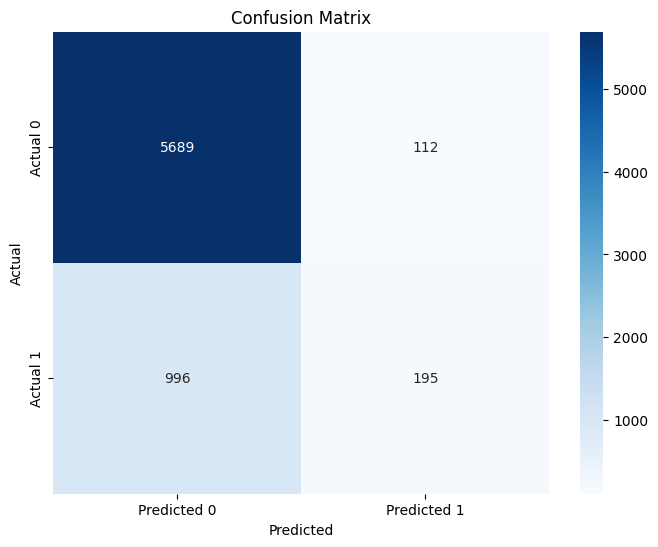

In [ ]:
# prompt: Try to use the model to predict for test data, and also create a confusion matrix, labeled which is actual and which is prediction, and calculate the accuracy, recall

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Calculate and print the recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### (2) Expected Payoff

Best Threshold: 0.02
Expected Total Profit at Best Threshold: 88220000


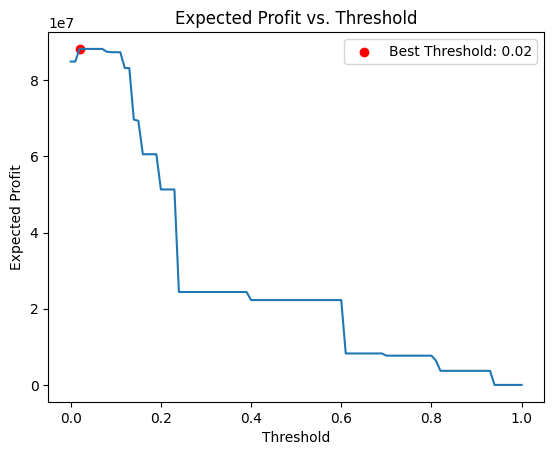

In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)
# This is for the single decision tree model

# Predict probabilities instead of class labels
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Define the expected payoff for each outcome
tp_payoff = 120000  # True Positive
fp_payoff = -10000  # False Positive
tn_payoff = 0      # True Negative
fn_payoff = 0      # False Negative

# Calculate the expected total profit for different thresholds
thresholds = np.linspace(0, 1, 101) # Create 101 threshold values between 0 and 1
expected_profits = []
for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresholded)
    tn, fp, fn, tp = cm.ravel()
    expected_profit = (tp * tp_payoff) + (fp * fp_payoff) + (tn * tn_payoff) + (fn * fn_payoff)
    expected_profits.append(expected_profit)

# Find the best threshold and its corresponding expected profit
best_threshold = thresholds[np.argmax(expected_profits)]
best_profit = np.max(expected_profits)

print(f"Best Threshold: {best_threshold}")
print(f"Expected Total Profit at Best Threshold: {best_profit}")

# Plot the expected profit against different thresholds (optional)
plt.plot(thresholds, expected_profits)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.title("Expected Profit vs. Threshold")
plt.scatter(best_threshold, best_profit, color='red', label=f'Best Threshold: {best_threshold:.2f}')
plt.legend()
plt.show()

             Feature  Importance
9   number_of_genres    0.690828
6   instrumentalness    0.250733
4        speechiness    0.029457
1       danceability    0.022402
0     released_month    0.004666
8              tempo    0.001915
2           loudness    0.000000
3               mode    0.000000
5       acousticness    0.000000
7           liveness    0.000000
10         cluster_1    0.000000
11         cluster_2    0.000000
12         cluster_3    0.000000


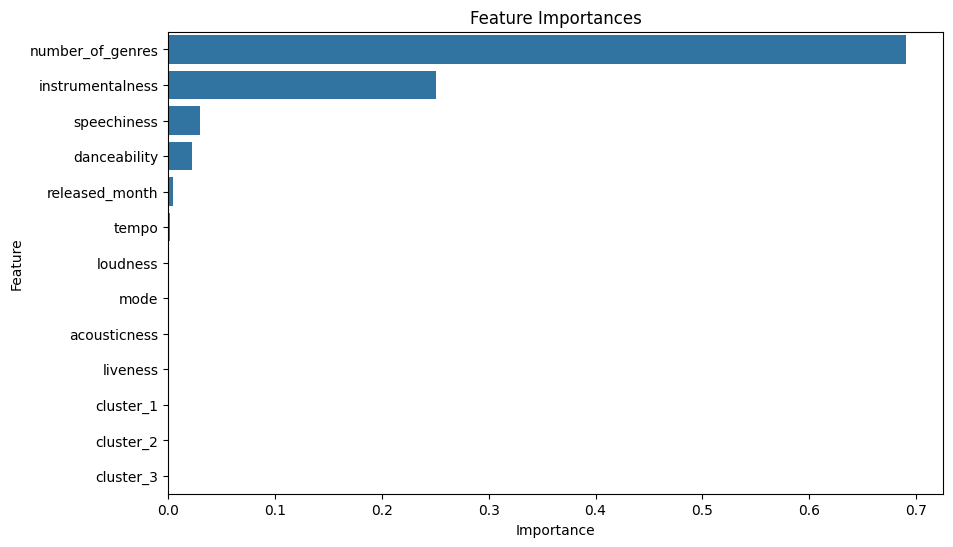

In [ ]:
# prompt: Help me decide the feature importance from the decision tree model

# Get feature importances from the trained decision tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance DataFrame
print(feature_importance_df)


# You can also visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 4. Partial Least Squares (PLS) (Not use for this time)

In [ ]:
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.preprocessing import StandardScaler
pls = PLS(n_components=8)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_trnst = scaler_X.fit_transform(X_train)
X_testing = scaler_X.transform(X_test)
y_trnst = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
y_testing = scaler_Y.transform(y_test.values.reshape(-1, 1))


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
pls.fit(X_trnst, y_trnst)

y_pred = pls.predict(X_testing)

mse = mean_squared_error(y_testing, y_pred)
r2 = r2_score(y_testing, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.9065192933555197
R-squared (R2): 0.0931920561352848


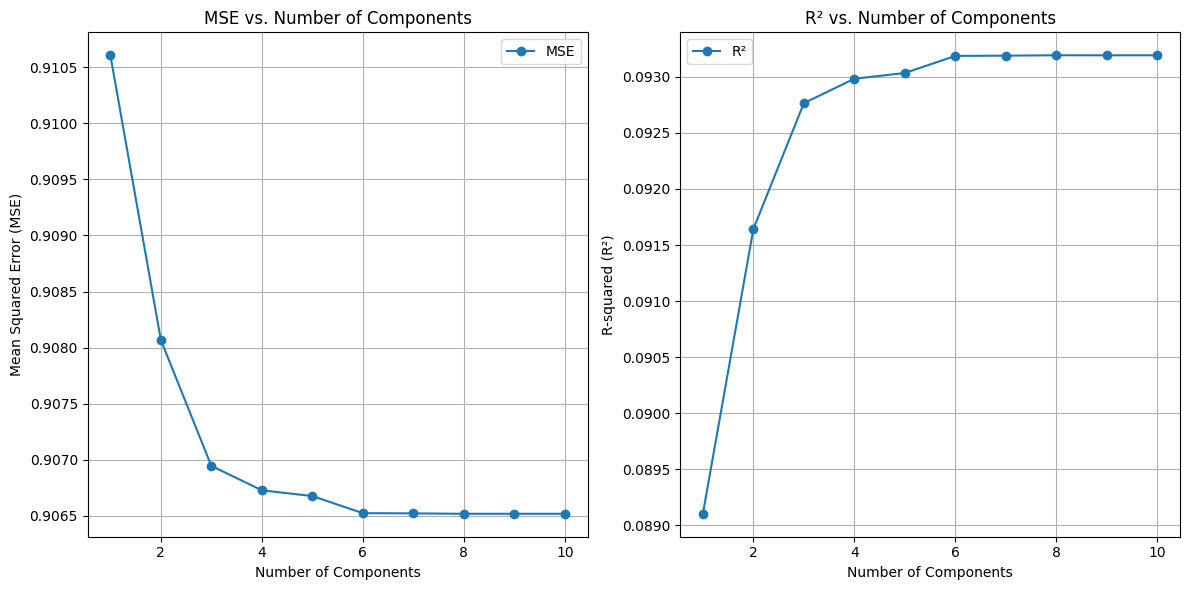

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Initialize empty lists to store MSE and R² for different numbers of components
mse_list = []
r2_list = []
n_components_range = range(1, 11)  # Test from 1 to 10 components

# Scale the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_trnst = scaler_X.fit_transform(X_train)
X_testing = scaler_X.transform(X_test)
y_trnst = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
y_testing = scaler_Y.transform(y_test.values.reshape(-1, 1))

# Loop through different values of n_components
for n_components in n_components_range:
    pls = PLS(n_components=n_components)
    pls.fit(X_trnst, y_trnst)
    y_pred = pls.predict(X_testing)
    mse = mean_squared_error(y_testing, y_pred)
    r2 = r2_score(y_testing, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot MSE and R² against n_components
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(n_components_range, mse_list, marker='o', label='MSE')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Components')
plt.grid()
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)
plt.plot(n_components_range, r2_list, marker='o', label='R²')
plt.xlabel('Number of Components')
plt.ylabel('R-squared (R²)')
plt.title('R² vs. Number of Components')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_pred

array([[ 0.9046876 ],
       [ 0.14658396],
       [-0.19120289],
       ...,
       [ 0.95345821],
       [-0.11281387],
       [ 0.01904083]])

## 5. Random Forest


In [ ]:
# prompt: Using Train and test data I have created, build a random forest model

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 1000, max_depth=15, min_samples_split=10, min_samples_leaf=5, random_state=528)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Confusion Matrix:")
print(cm_rf)
print(f"Accuracy: {accuracy_rf}")
print(f"Recall: {recall_rf}")

# Calculate Expected Payoff for Random Forest
TN_rf = cm_rf[0, 0]
FP_rf = cm_rf[0, 1]
FN_rf = cm_rf[1, 0]
TP_rf = cm_rf[1, 1]

expected_payoff_rf = (TP_rf * 120000) + (TN_rf * 0) - (FP_rf * 10000) - (FN_rf * 0)
print(f"Expected Payoff (Random Forest): ${expected_payoff_rf}")

Random Forest Results:
Confusion Matrix:
[[5707   94]
 [1000  191]]
Accuracy: 0.8435354691075515
Recall: 0.16036943744752308
Expected Payoff (Random Forest): $21980000


Random Forest - Best Threshold: 0.08
Random Forest - Expected Total Profit at Best Threshold: 89490000


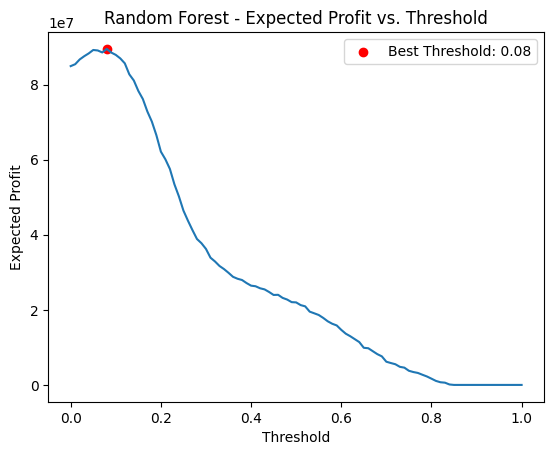

In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)
# This is for the random forest model

# Predict probabilities for the Random Forest model
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Define the expected payoff for each outcome (same as before)
tp_payoff = 120000  # True Positive
fp_payoff = -10000  # False Positive
tn_payoff = 0      # True Negative
fn_payoff = 0      # False Negative

# Calculate the expected total profit for different thresholds
thresholds = np.linspace(0, 1, 101)
expected_profits_rf = []
for threshold in thresholds:
    y_pred_thresholded_rf = (y_pred_prob_rf >= threshold).astype(int)
    cm_rf = confusion_matrix(y_test, y_pred_thresholded_rf)
    tn, fp, fn, tp = cm_rf.ravel()
    expected_profit = (tp * tp_payoff) + (fp * fp_payoff) + (tn * tn_payoff) + (fn * fn_payoff)
    expected_profits_rf.append(expected_profit)

# Find the best threshold and its corresponding expected profit for Random Forest
best_threshold_rf = thresholds[np.argmax(expected_profits_rf)]
best_profit_rf = np.max(expected_profits_rf)

print(f"Random Forest - Best Threshold: {best_threshold_rf}")
print(f"Random Forest - Expected Total Profit at Best Threshold: {best_profit_rf}")

# Plot the expected profit against different thresholds (optional)
plt.plot(thresholds, expected_profits_rf)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.title("Random Forest - Expected Profit vs. Threshold")
plt.scatter(best_threshold_rf, best_profit_rf, color='red', label=f'Best Threshold: {best_threshold_rf:.2f}')
plt.legend()
plt.show()

             Feature  Importance
9   number_of_genres    0.180058
2           loudness    0.128648
6   instrumentalness    0.117466
5       acousticness    0.105190
1       danceability    0.104987
4        speechiness    0.097292
7           liveness    0.089542
8              tempo    0.084947
0     released_month    0.051234
3               mode    0.012190
12         cluster_3    0.010266
11         cluster_2    0.009982
10         cluster_1    0.008197


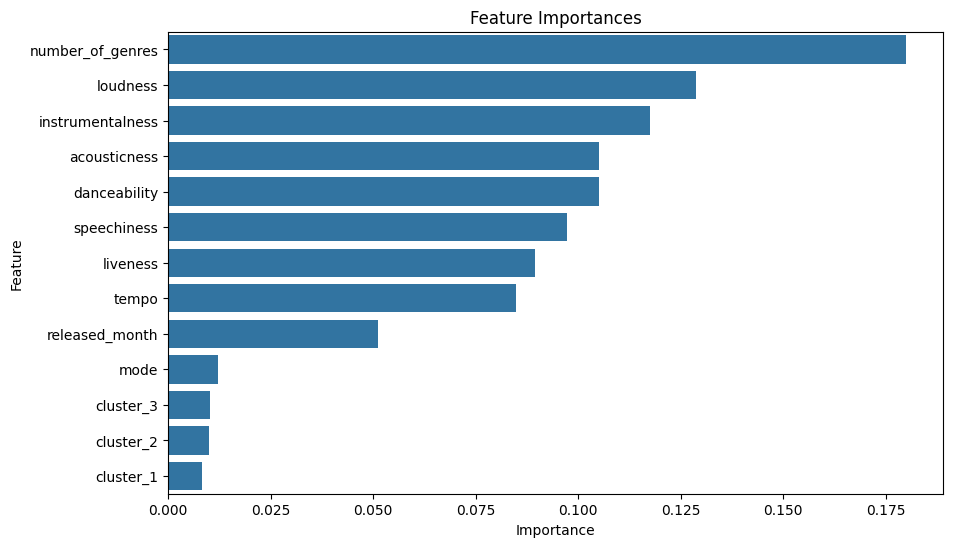

In [ ]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 6. XGBoost

In [ ]:
# prompt: Using train and test data to build XGBoost model

import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.04, n_estimators=200, random_state=528)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("Confusion Matrix:")
print(cm_xgb)
print(f"Accuracy: {accuracy_xgb}")
print(f"Recall: {recall_xgb}")

# Calculate Expected Payoff for XGBoost
TN_xgb = cm_xgb[0, 0]
FP_xgb = cm_xgb[0, 1]
FN_xgb = cm_xgb[1, 0]
TP_xgb = cm_xgb[1, 1]

expected_payoff_xgb = (TP_xgb * 120000) + (TN_xgb * 0) - (FP_xgb * 10000) - (FN_xgb * 0)
print(f"Expected Payoff (XGBoost): ${expected_payoff_xgb}")

XGBoost Results:
Confusion Matrix:
[[5698  103]
 [ 978  213]]
Accuracy: 0.8453947368421053
Recall: 0.17884130982367757
Expected Payoff (XGBoost): $24530000


XGBoost - Best Threshold: 0.05
XGBoost - Expected Total Profit at Best Threshold: 89420000


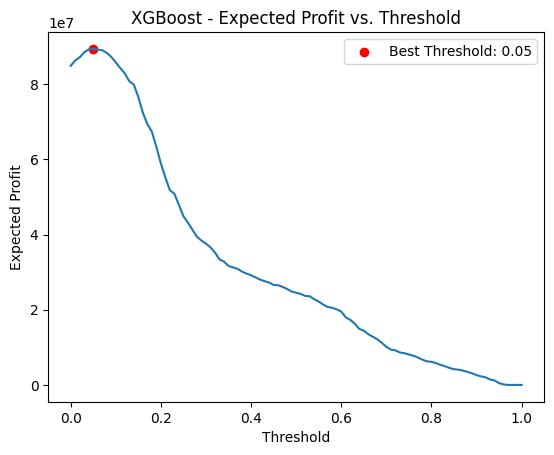

In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)
# This is for the XGBoost model

# Predict probabilities for the XGBoost model
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Define the expected payoff for each outcome (same as before)
tp_payoff = 120000  # True Positive
fp_payoff = -10000  # False Positive
tn_payoff = 0      # True Negative
fn_payoff = 0      # False Negative

# Calculate the expected total profit for different thresholds
thresholds = np.linspace(0, 1, 101)
expected_profits_xgb = []
for threshold in thresholds:
    y_pred_thresholded_xgb = (y_pred_prob_xgb >= threshold).astype(int)
    cm_xgb = confusion_matrix(y_test, y_pred_thresholded_xgb)
    tn, fp, fn, tp = cm_xgb.ravel()
    expected_profit = (tp * tp_payoff) + (fp * fp_payoff) + (tn * tn_payoff) + (fn * fn_payoff)
    expected_profits_xgb.append(expected_profit)

# Find the best threshold and its corresponding expected profit for XGBoost
best_threshold_xgb = thresholds[np.argmax(expected_profits_xgb)]
best_profit_xgb = np.max(expected_profits_xgb)

print(f"XGBoost - Best Threshold: {best_threshold_xgb}")
print(f"XGBoost - Expected Total Profit at Best Threshold: {best_profit_xgb}")

# Plot the expected profit against different thresholds (optional)
plt.plot(thresholds, expected_profits_xgb)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.title("XGBoost - Expected Profit vs. Threshold")
plt.scatter(best_threshold_xgb, best_profit_xgb, color='red', label=f'Best Threshold: {best_threshold_xgb:.2f}')
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(xgb_model, n_features_to_select=5, direction='forward', scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

# Check the selected features
selected_features = sfs.get_support(indices=True)
print(f"Selected Features: {selected_features}")

Selected Features: [0 2 6 7 9]


             Feature  Importance
9   number_of_genres    0.467020
6   instrumentalness    0.123890
2           loudness    0.063977
12         cluster_3    0.050044
10         cluster_1    0.042822
1       danceability    0.034852
3               mode    0.033730
0     released_month    0.032088
4        speechiness    0.032023
5       acousticness    0.032007
11         cluster_2    0.030512
8              tempo    0.030191
7           liveness    0.026845


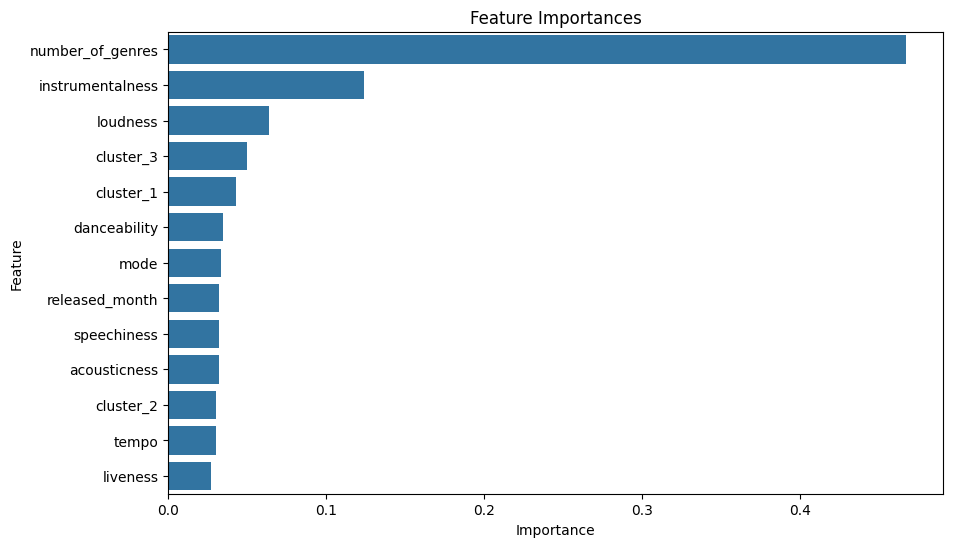

In [ ]:
# prompt: Do feature importance by XGBoost

# Assuming xgb_model is already trained as in your provided code

importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 7. CatBoost

In [ ]:
# prompt: Using Train and test data help me build Catboost model

!pip install catboost # Add if needed

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000,  # Adjust as needed
                                   learning_rate=0.05, # Adjust as needed
                                   depth=6,           # Adjust as needed
                                   random_seed=528,
                                   l2_leaf_reg=5,
                                   eval_metric='Accuracy',
                                   verbose=100)


# Train the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))


# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)

print("CatBoost Results:")
print("Confusion Matrix:")
print(cm_catboost)
print(f"Accuracy: {accuracy_catboost}")
print(f"Recall: {recall_catboost}")

# Calculate Expected Payoff for CatBoost
TN_catboost = cm_catboost[0, 0]
FP_catboost = cm_catboost[0, 1]
FN_catboost = cm_catboost[1, 0]
TP_catboost = cm_catboost[1, 1]

expected_payoff_catboost = (TP_catboost * 120000) + (TN_catboost * 0) - (FP_catboost * 10000) - (FN_catboost * 0)
print(f"Expected Payoff (CatBoost): ${expected_payoff_catboost}")


# Feature Importance
# feature_importances = catboost_model.get_feature_importance(prettified=True)
# feature_importances

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00
0:	learn: 0.8443055	test: 0.8406751	best: 0.8406751 (0)	total: 55.8ms	remaining: 55.7s
100:	learn: 0.8536227	test: 0.8459668	best: 0.8463959 (94)	total: 836ms	remaining: 7.45s
200:	learn: 0.8571779	test: 0.8486842	best: 0.8488272 (194)	total: 1.62s	remaining: 6.44s
300:	learn: 0.8599363	test: 0.8473970	best: 0.8488272 (194)	total: 2.38s	remaining: 5.54s
400:	learn: 0.8636141	test: 0.8478261	best: 0.8488272 (194)	total: 5s	remaining: 7.46s
500:	learn: 0.8664950	test: 0.8478261	best: 0.8488272 (194)	total: 8.38s	remaining: 8.34s
600:	learn: 0.8701729	test: 0.8478261	best: 0.8488272 (194)	total: 10.9s	remaining: 7.24s
700:	learn: 0.8732990	test: 0.8472540	best: 0.8488272 (194)	total: 12.5s	remaining: 5.33s
800:	learn: 0.8773446	test: 0.8466819	best: 0.8488272 (194)	total: 13.7s	remaining: 3.41s
900:	learn: 0.8817580	test: 0.8473970	best: 0.8488272 (194)	total: 14.5s	remaining: 1.59s
999:	learn: 0.8858036	test: 0

CatBoost - Best Threshold: 0.06
CatBoost - Expected Total Profit at Best Threshold: 90490000


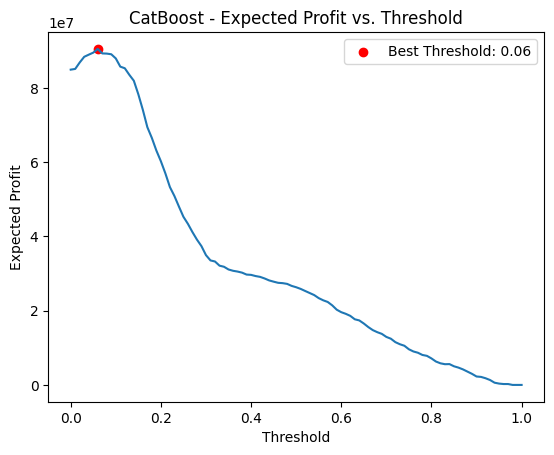

In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)
# This is for the CatBoost model

# Predict probabilities for the CatBoost model
y_pred_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Define the expected payoff for each outcome (same as before)
tp_payoff = 120000  # True Positive
fp_payoff = -10000  # False Positive
tn_payoff = 0      # True Negative
fn_payoff = 0      # False Negative

# Calculate the expected total profit for different thresholds
thresholds = np.linspace(0, 1, 101)
expected_profits_catboost = []
for threshold in thresholds:
    y_pred_thresholded_catboost = (y_pred_prob_catboost >= threshold).astype(int)
    cm_catboost = confusion_matrix(y_test, y_pred_thresholded_catboost)
    tn, fp, fn, tp = cm_catboost.ravel()
    expected_profit = (tp * tp_payoff) + (fp * fp_payoff) + (tn * tn_payoff) + (fn * fn_payoff)
    expected_profits_catboost.append(expected_profit)

# Find the best threshold and its corresponding expected profit for CatBoost
best_threshold_catboost = thresholds[np.argmax(expected_profits_catboost)]
best_profit_catboost = np.max(expected_profits_catboost)

print(f"CatBoost - Best Threshold: {best_threshold_catboost}")
print(f"CatBoost - Expected Total Profit at Best Threshold: {best_profit_catboost}")

# Plot the expected profit against different thresholds (optional)
plt.plot(thresholds, expected_profits_catboost)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.title("CatBoost - Expected Profit vs. Threshold")
plt.scatter(best_threshold_catboost, best_profit_catboost, color='red', label=f'Best Threshold: {best_threshold_catboost:.2f}')
plt.legend()
plt.show()

In [ ]:
# prompt: Using the best threshold of Catboost, calculate the accuracy and recall and other matrics for model

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Assuming 'best_threshold_catboost' is already calculated from the previous code
y_pred_thresholded_catboost = (y_pred_prob_catboost >= best_threshold_catboost).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_thresholded_catboost)
recall = recall_score(y_test, y_pred_thresholded_catboost)
precision = precision_score(y_test, y_pred_thresholded_catboost)
f1 = f1_score(y_test, y_pred_thresholded_catboost)
roc_auc = roc_auc_score(y_test, y_pred_prob_catboost) # Use probabilities for ROC AUC
cm = confusion_matrix(y_test, y_pred_thresholded_catboost)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.3193649885583524
Recall: 0.963056255247691
Precision: 0.19566700784715113
F1 Score: 0.32525166595774846
ROC AUC: 0.7280879364295016
Confusion Matrix:
[[1086 4715]
 [  44 1147]]


             Feature  Importance
6   instrumentalness   22.157960
2           loudness   19.782250
9   number_of_genres   12.266867
1       danceability    8.884632
8              tempo    7.451592
4        speechiness    6.950857
5       acousticness    6.269926
0     released_month    5.189120
7           liveness    4.288368
12         cluster_3    2.199468
11         cluster_2    1.850463
3               mode    1.358353
10         cluster_1    1.350144


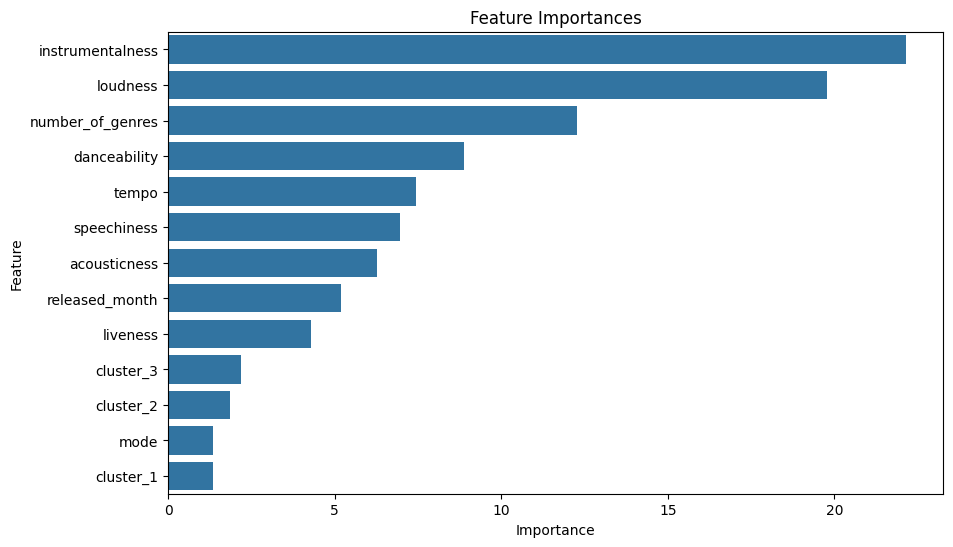

In [ ]:
importances = catboost_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 8. Neural Network

In [ ]:
# prompt: Using Train and test data help me build Neural network model, with less layer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32") # Adjust threshold if needed

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(cm_nn)

# Calculate Expected Payoff for Neural Network
TN_nn = cm_nn[0, 0]
FP_nn = cm_nn[0, 1]
FN_nn = cm_nn[1, 0]
TP_nn = cm_nn[1, 1]

expected_payoff_nn = (TP_nn * 120000) + (TN_nn * 0) - (FP_nn * 10000) - (FN_nn * 0)
print(f"Expected Payoff (Neural Network): ${expected_payoff_nn}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8192 - loss: 0.5563 - val_accuracy: 0.8388 - val_loss: 0.4452
Epoch 2/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8279 - loss: 0.4601 - val_accuracy: 0.8388 - val_loss: 0.4389
Epoch 3/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8315 - loss: 0.4508 - val_accuracy: 0.8388 - val_loss: 0.4345
Epoch 4/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8215 - loss: 0.4615 - val_accuracy: 0.8388 - val_loss: 0.4366
Epoch 5/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8212 - loss: 0.4587 - val_accuracy: 0.8388 - val_loss: 0.4260
Epoch 6/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8281 - loss: 0.4448 - val_accuracy: 0.8391 - val_loss: 0.4222
Epoch 7/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8319 - loss: 0.4372 - val_accuracy: 0.8437 - val_loss: 0.4602
Epoch 8/10
408/408 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8324 - loss: 0.4333 - val_accura

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network - Best Threshold: 0.07
Neural Network - Expected Total Profit at Best Threshold: 87840000


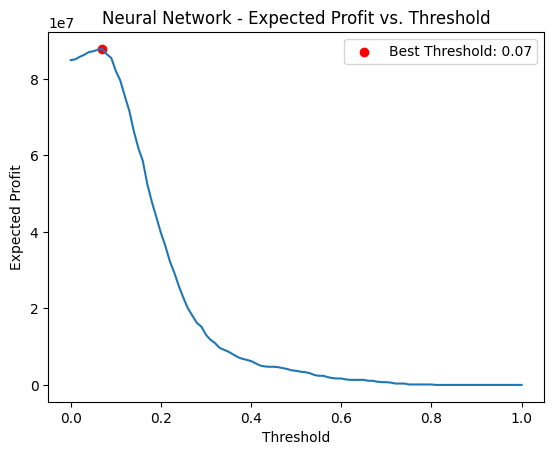

In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)
# This is for the Neural Network model

# Predict probabilities for the Neural Network model
y_pred_prob_nn = model.predict(X_test)

# Calculate the expected total profit for different thresholds
thresholds = np.linspace(0, 1, 101)
expected_profits_nn = []
for threshold in thresholds:
    y_pred_thresholded_nn = (y_pred_prob_nn >= threshold).astype("int32")
    cm_nn = confusion_matrix(y_test, y_pred_thresholded_nn)
    tn, fp, fn, tp = cm_nn.ravel()
    expected_profit = (tp * 120000) + (fp * -10000) + (tn * 0) + (fn * 0)
    expected_profits_nn.append(expected_profit)

# Find the best threshold and its corresponding expected profit for Neural Network
best_threshold_nn = thresholds[np.argmax(expected_profits_nn)]
best_profit_nn = np.max(expected_profits_nn)

print(f"Neural Network - Best Threshold: {best_threshold_nn}")
print(f"Neural Network - Expected Total Profit at Best Threshold: {best_profit_nn}")

# Plot the expected profit against different thresholds (optional)
plt.plot(thresholds, expected_profits_nn)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.title("Neural Network - Expected Profit vs. Threshold")
plt.scatter(best_threshold_nn, best_profit_nn, color='red', label=f'Best Threshold: {best_threshold_nn:.2f}')
plt.legend()
plt.show()

# 9. Logistic Regression

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

columns = [
       'released_month', 'danceability',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'number_of_genres',
           'cluster_1', 'cluster_2', 'cluster_3']
X_train_num = X_train[columns]
X_test_num = X_test[columns]

# Add a constant to the independent variables
X_train_num = sm.add_constant(X_train_num)
X_test_num = sm.add_constant(X_test_num)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_num)
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.405482
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                16314
Model:                          Logit   Df Residuals:                    16300
Method:                           MLE   Df Model:                           13
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.1118
Time:                        06:03:15   Log-Likelihood:                -6615.0
converged:                       True   LL-Null:                       -7447.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.0162      0.204    -19.655      0.000      -4.417      -3.616
released_mo

Logistic Regression - Best Threshold: 0.05
Logistic Regression - Expected Total Profit at Best Threshold: 88740000


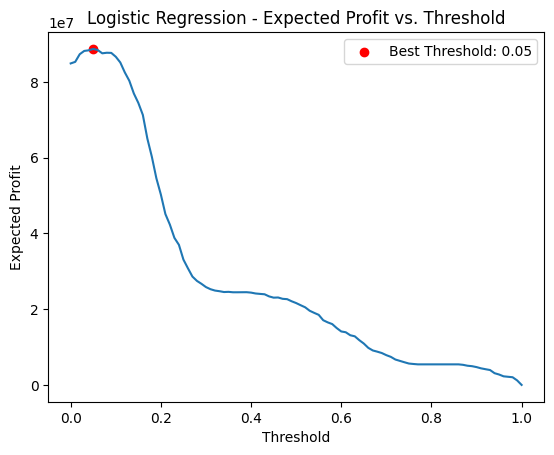

In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)
# # This is for the Logistic regression model

# Predict probabilities for the Logistic Regression model
y_pred_prob_lr = result.predict(X_test_num)

# Calculate the expected total profit for different thresholds
thresholds = np.linspace(0, 1, 101)
expected_profits_lr = []
for threshold in thresholds:
    y_pred_thresholded_lr = (y_pred_prob_lr >= threshold).astype(int)
    cm_lr = confusion_matrix(y_test, y_pred_thresholded_lr)
    tn, fp, fn, tp = cm_lr.ravel()
    expected_profit = (tp * 120000) + (fp * -10000) + (tn * 0) + (fn * 0)
    expected_profits_lr.append(expected_profit)

# Find the best threshold and its corresponding expected profit for Logistic Regression
best_threshold_lr = thresholds[np.argmax(expected_profits_lr)]
best_profit_lr = np.max(expected_profits_lr)

print(f"Logistic Regression - Best Threshold: {best_threshold_lr}")
print(f"Logistic Regression - Expected Total Profit at Best Threshold: {best_profit_lr}")

# Plot the expected profit against different thresholds (optional)
plt.plot(thresholds, expected_profits_lr)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.title("Logistic Regression - Expected Profit vs. Threshold")
plt.scatter(best_threshold_lr, best_profit_lr, color='red', label=f'Best Threshold: {best_threshold_lr:.2f}')
plt.legend()
plt.show()

# Comparison


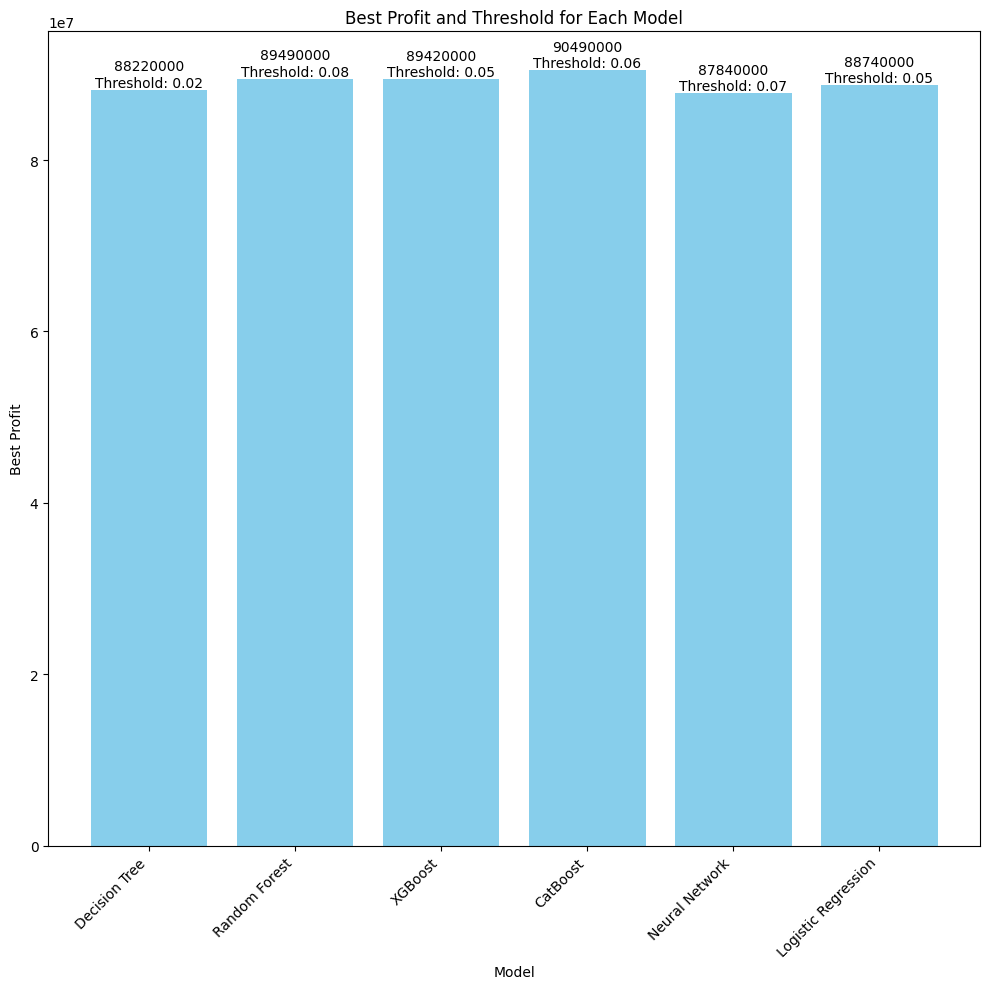

In [ ]:
# prompt: Now help me draw bar charts of each model's best profit and threshold, show the value on the top of each bar

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'Neural Network', 'Logistic Regression']
best_profits = [best_profit, best_profit_rf, best_profit_xgb, best_profit_catboost, best_profit_nn, best_profit_lr]
best_thresholds = [best_threshold, best_threshold_rf, best_threshold_xgb, best_threshold_catboost, best_threshold_nn, best_threshold_lr]

# Create the bar chart
plt.figure(figsize=(10, 10))
bars = plt.bar(models, best_profits, color='skyblue')

# Add the profit values on top of each bar
for bar, profit, threshold in zip(bars, best_profits, best_thresholds):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{profit:.0f}\nThreshold: {threshold:.2f}', ha='center', va='bottom')

plt.xlabel("Model")
plt.ylabel("Best Profit")
plt.title("Best Profit and Threshold for Each Model")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

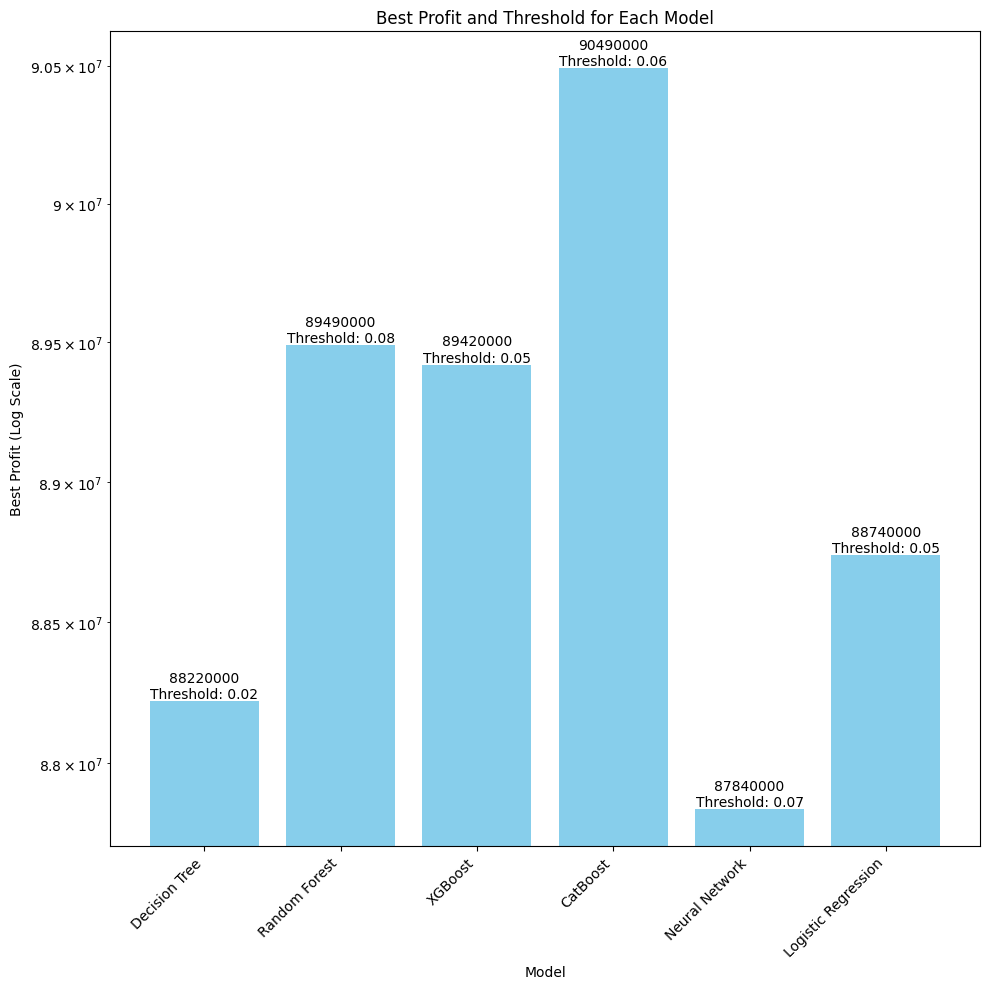

In [ ]:
# Sample data (replace with your actual data)
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'Neural Network', 'Logistic Regression']
best_profits = [best_profit, best_profit_rf, best_profit_xgb, best_profit_catboost, best_profit_nn, best_profit_lr]
best_thresholds = [best_threshold, best_threshold_rf, best_threshold_xgb, best_threshold_catboost, best_threshold_nn, best_threshold_lr]

# Create the bar chart
plt.figure(figsize=(10, 10))

bars = plt.bar(models, best_profits, color='skyblue')

# Add the profit values on top of each bar
for bar, profit, threshold in zip(bars, best_profits, best_thresholds):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{profit:.0f}\nThreshold: {threshold:.2f}', ha='center', va='bottom')

plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xlabel("Model")
plt.ylabel("Best Profit (Log Scale)")
plt.title("Best Profit and Threshold for Each Model")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Model Testing


In [ ]:
spotify2_final = pd.read_csv('/content/drive/MyDrive/DSO 528/DSO528 Final Project/Data/spotify2_final.csv')

In [ ]:
spotify2_final.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'streams', 'tempo', 'key', 'mode',
       'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'popular', 'loudness', 'playlist_genre',
       'track_id', 'duration_ms', 'released_date'],
      dtype='object')

In [ ]:
# Categorize data based on energy and valence
spotify2_final['cluster_1'] = 0
spotify2_final['cluster_2'] = 0
spotify2_final['cluster_3'] = 0  # Initialize the new column
spotify2_final.loc[(spotify2_final['energy'] > 0.65) & (spotify2_final['valence'] <= 0.55), 'cluster_1'] = 1
spotify2_final.loc[(spotify2_final['energy'] <= 0.65) & (spotify2_final['valence'] > 0.55), 'cluster_2'] = 1
spotify2_final.loc[(spotify2_final['energy'] <= 0.65) & (spotify2_final['valence'] <= 0.55), 'cluster_3'] = 1

In [ ]:
spotify2_final = spotify2_final.drop(columns=['released_day','streams','loudness','playlist_genre', 'track_id', 'duration_ms', 'released_date'])

In [ ]:
spotify2_final.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'tempo', 'key', 'mode', 'danceability', 'valence',
       'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'popular', 'cluster_1', 'cluster_2', 'cluster_3'],
      dtype='object')

In [ ]:
# prompt: Build a same catboost model named catboost2 as I have build with these features = ['released_month', 'danceability', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'cluster_1', 'cluster_2', 'cluster_3'], then doing prediction on spotify2_final

features = ['released_month', 'danceability', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'cluster_1', 'cluster_2', 'cluster_3']
catboost2 = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_seed=528, l2_leaf_reg=5, eval_metric='Accuracy', verbose=100)
catboost2.fit(spotify1_final[features], y) # Assuming X_train and y_train are defined in your previous code
spotify2_final_predictions = catboost2.predict(spotify2_final[features])

0:	learn: 0.8296147	total: 11.9ms	remaining: 11.8s
100:	learn: 0.8296147	total: 1.06s	remaining: 9.45s
200:	learn: 0.8308590	total: 2.01s	remaining: 8.01s
300:	learn: 0.8333047	total: 2.97s	remaining: 6.9s
400:	learn: 0.8359221	total: 3.9s	remaining: 5.83s
500:	learn: 0.8383249	total: 4.83s	remaining: 4.81s
600:	learn: 0.8403415	total: 5.72s	remaining: 3.8s
700:	learn: 0.8429160	total: 7.99s	remaining: 3.41s
800:	learn: 0.8454475	total: 10.8s	remaining: 2.67s
900:	learn: 0.8477216	total: 15.2s	remaining: 1.68s
999:	learn: 0.8498241	total: 17.5s	remaining: 0us


In [ ]:
# prompt: Doing prediction on spotify2_final['popular'] using the threshold 0.06 and calculate the accuracy and confusion matrix

# Assuming spotify2_final and features are defined as in your provided code
# and catboost2 is the trained CatBoostClassifier model

# Make predictions using the best threshold from CatBoost
y_pred_prob_catboost_final = catboost2.predict_proba(spotify2_final[features])[:, 1]
y_pred_final = (y_pred_prob_catboost_final >= 0.06).astype(int)

# Assuming 'popular' is the target column in spotify2_final
accuracy_final = accuracy_score(spotify2_final['popular'], y_pred_final)
cm_final = confusion_matrix(spotify2_final['popular'], y_pred_final)

print(f"Final Accuracy: {round(accuracy_final,2)}")
print(f"Final Confusion Matrix (Threshold 0.06):\n{cm_final}")

Final Accuracy: 0.98
Final Confusion Matrix (Threshold 0.06):
[[  0   0]
 [ 13 717]]


             Feature  Importance
5   instrumentalness   17.149330
3        speechiness   14.585714
7              tempo   14.083090
1       danceability   14.056488
4       acousticness   13.391261
6           liveness   11.904104
0     released_month    8.212974
9          cluster_2    1.925477
2               mode    1.640107
8          cluster_1    1.592474
10         cluster_3    1.458980


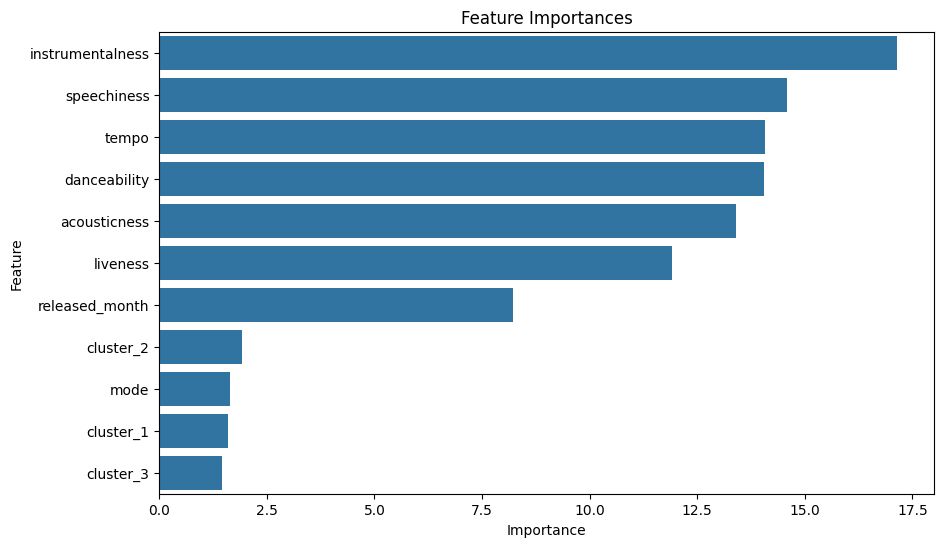

In [ ]:
# prompt: Do the feature importance based on the catboost2 model

importances = catboost2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# prompt: Save /content/drive/MyDrive/DSO 528/DSO528 Final Project/Final_Project_Model_exploration.ipynb to html in /content/drive/MyDrive/DSO 528/DSO528 Final Project/Final_Project_Model_exploration.html

!jupyter nbconvert --to html /content/drive/MyDrive/DSO\ 528/DSO528\ Final\ Project/Final_Project_Model_exploration.ipynb --output /content/drive/MyDrive/DSO\ 528/DSO528\ Final\ Project/Final_Project_Model_exploration.html

[NbConvertApp] Converting notebook /content/drive/MyDrive/DSO 528/DSO528 Final Project/Final_Project_Model_exploration.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1365571 bytes to /content/drive/MyDrive/DSO 528/DSO528 Final Project/Final_Project_Model_exploration.html
